/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 502218096640.0000 - mae: 578895.1875 - val_loss: 825678168064.0000 - val_mae: 680188.8125
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 658117427200.0000 - mae: 615445.8750 - val_loss: 825649987584.0000 - val_mae: 680172.1250
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 568041078784.0000 - mae: 579994.5000 - val_loss: 825603325952.0000 - val_mae: 680147.8125
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 708182212608.0000 - mae: 626149.8750 - val_loss: 825493880832.0000 - val_mae: 680081.3125
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 741568151552.0000 - mae: 631660.1875 - val_loss: 825287770112.0000 - val_mae: 679955.4375
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 703961759744.0000 - mae: 631345.9375 - val_loss: 824956092416.0000 - val_mae: 679752.7500
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 632129716224.0000 - mae: 613645.9375 - val_los

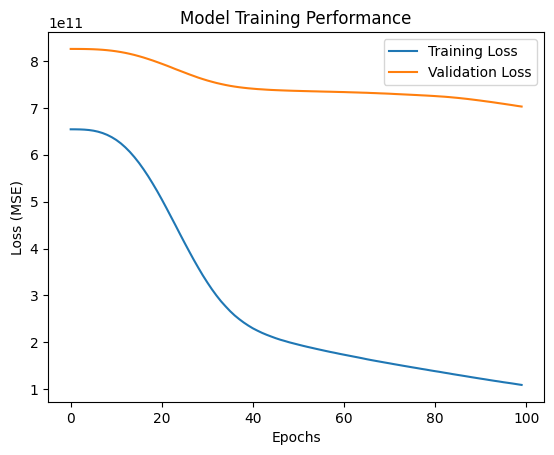

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Load dataset
data = pd.read_csv('/content/HousingPrices-Amsterdam-August-2021.csv')

# 2. Drop unused columns
data = data.drop(['Unnamed: 0', 'Address'], axis=1)

# 3. One-hot encode 'Zip' (categorical)
data = pd.get_dummies(data, columns=['Zip'], drop_first=True)

# 4. Drop rows with missing values (if any)
data = data.dropna()

# 5. Define features (X) and target (y)
feature_cols = ['Area', 'Room', 'Lat', 'Lon'] + [col for col in data.columns if col.startswith('Zip_')]
X = data[feature_cols].values
y = data['Price'].values

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 8. Build model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Regression output
])

# 9. Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# 10. Train model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

# 11. Evaluate model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Mean Absolute Error: {test_mae:.2f}")

# 12. Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Model Training Performance')
plt.legend()
plt.show()


In [3]:
predictions = model.predict(X_test)
predictions

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1062461.1 ],
       [1491039.9 ],
       [1315403.8 ],
       [1498564.  ],
       [ 428376.  ],
       [1390796.8 ],
       [1527236.9 ],
       [1336037.8 ],
       [1517010.1 ],
       [1476120.6 ],
       [1626244.4 ],
       [ 681597.7 ],
       [ 380557.66],
       [1486582.8 ],
       [1460613.8 ],
       [1433775.6 ],
       [1603514.2 ],
       [1513350.1 ],
       [1764350.8 ],
       [1399872.9 ],
       [1494478.1 ],
       [1529462.6 ],
       [1345481.6 ],
       [1428712.4 ],
       [1463570.8 ],
       [1450875.4 ],
       [1483186.1 ],
       [1344255.4 ],
       [1444802.5 ],
       [1030692.8 ],
       [1710590.8 ],
       [1358754.9 ],
       [ 843591.5 ],
       [ 723159.5 ],
       [1345736.6 ],
       [1459967.4 ],
       [ 900768.94],
       [1344854.4 ],
       [1368284.1 ],
       [1428049.6 ],
       [1586192.1 ],
       [2183915.5 ],
       [1469135.8 ],
       [1583523.5 ],
       [ 430791.53],
       [1511319.5 ],
       [ 391093.4 ],
       [14460

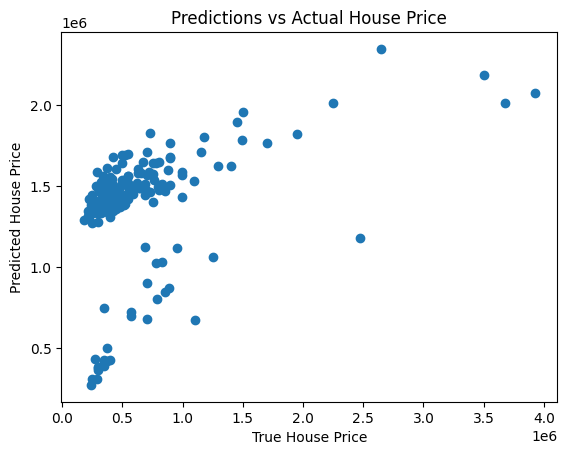

In [4]:
plt.scatter(y_test, predictions)
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Predictions vs Actual House Price')
plt.show()